# CODSOFT DATA SCIENCE INTERNSHIP

## TASK NO:1 TITANIC SURVIVAL PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
df.drop(columns=['Cabin','Ticket','PassengerId','Name'],inplace=True)

In [9]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [10]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [11]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
LE = LabelEncoder()

In [14]:
df[['Embarked', 'Sex']] = df[['Embarked', 'Sex']].apply(lambda x: LE.fit_transform(x))


In [15]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [16]:
df.duplicated().sum()

38

In [17]:
df = df.drop_duplicates()

In [18]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         58
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [19]:
df['Age'].mean()

30.324534161490682

In [20]:
df['Age'] =  df['Age'].fillna(value=df['Age'].mean())

In [21]:
df = df.dropna()

In [22]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.096850,-1.000000,0.004889,0.088627,0.152756,0.185175,-0.079934
Pclass,-0.096850,1.000000,0.096850,-0.461800,0.027446,0.044105,-0.573116,0.265072
Sex,-1.000000,0.096850,1.000000,-0.004889,-0.088627,-0.152756,-0.185175,0.079934
Age,0.004889,-0.461800,-0.004889,1.000000,-0.079898,-0.044640,0.331123,-0.168183
SibSp,0.088627,0.027446,-0.088627,-0.079898,1.000000,0.297044,0.155156,0.063133
Parch,0.152756,0.044105,-0.152756,-0.044640,0.297044,1.000000,0.215962,0.057298
Fare,0.185175,-0.573116,-0.185175,0.331123,0.155156,0.215962,1.000000,-0.270851
Embarked,-0.079934,0.265072,0.079934,-0.168183,0.063133,0.057298,-0.270851,1.000000


In [23]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.379947,2.216359,0.620053,30.244916,0.485488,0.432718,38.152946,1.401055
std,0.486015,0.851793,0.486015,13.151550,0.926777,1.022284,58.020997,0.868374
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,0.000000,2.000000,1.000000,30.000000,0.000000,0.000000,15.245800,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,36.877100,2.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 379 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  379 non-null    int64  
 1   Pclass    379 non-null    int64  
 2   Sex       379 non-null    int32  
 3   Age       379 non-null    float64
 4   SibSp     379 non-null    int64  
 5   Parch     379 non-null    int64  
 6   Fare      379 non-null    float64
 7   Embarked  379 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 23.7 KB


In [25]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


<Axes: xlabel='Age', ylabel='Fare'>

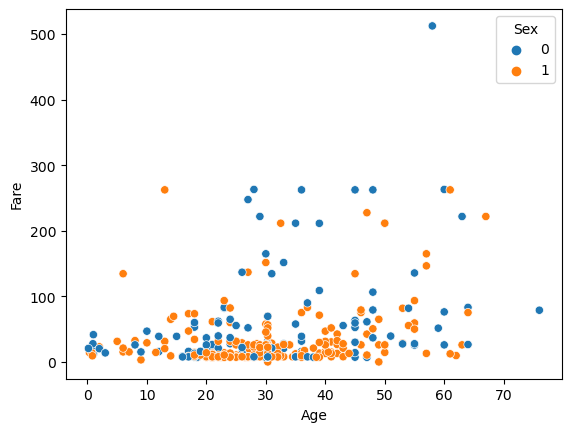

In [26]:
sns.scatterplot(x='Age',y='Fare',hue='Sex', data=df)

In [27]:
#from sklearn.preprocessing import MinMaxScaler

In [28]:
#Scaler = MinMaxScaler()

In [29]:
#df[['Age','Fare']] = Scaler.fit_transform(df[['Age','Fare']])

In [30]:
#df.head(5)

C:\Users\Saad\AppData\Local\Temp\ipykernel_1788\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

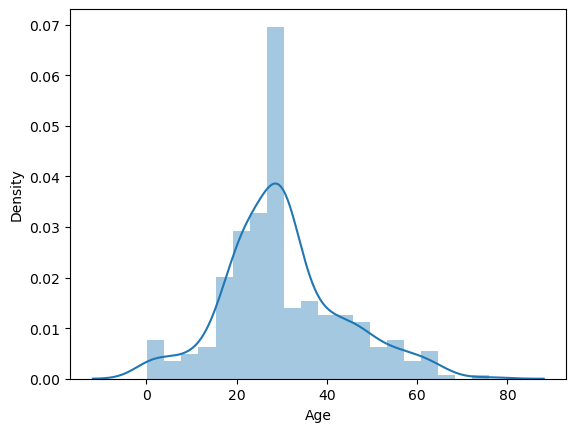

In [31]:
sns.distplot(df['Age'])

<Axes: xlabel='Survived', ylabel='count'>

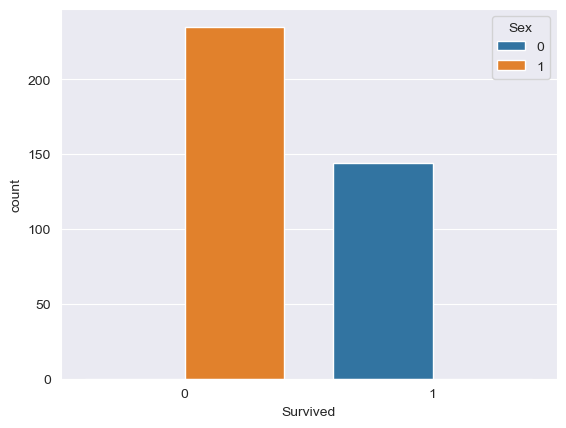

In [32]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

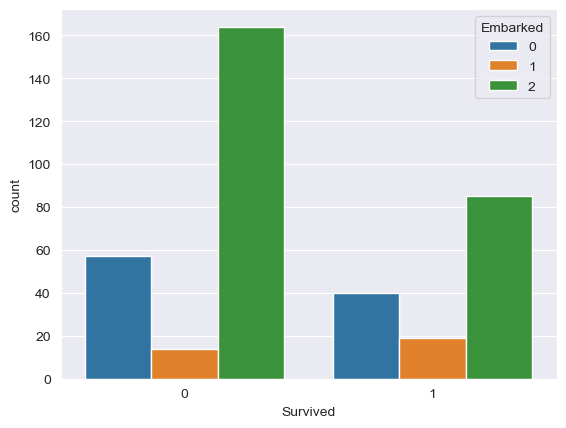

In [33]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Embarked', data=df)

<Axes: xlabel='Survived', ylabel='count'>

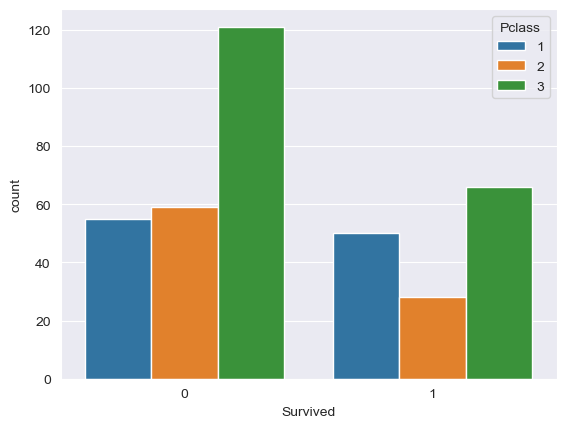

In [34]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass', data=df)

<Axes: xlabel='Survived', ylabel='count'>

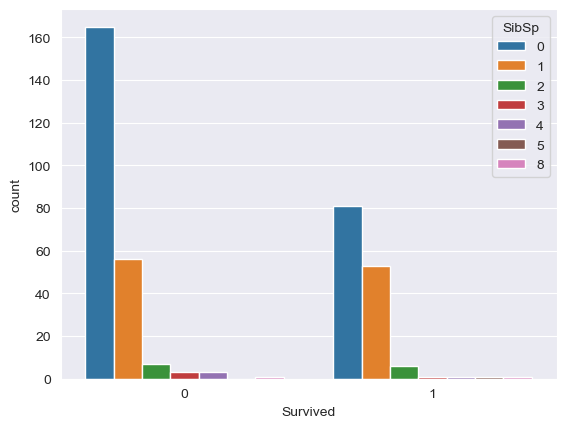

In [35]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='SibSp', data = df)

<Axes: xlabel='Survived', ylabel='count'>

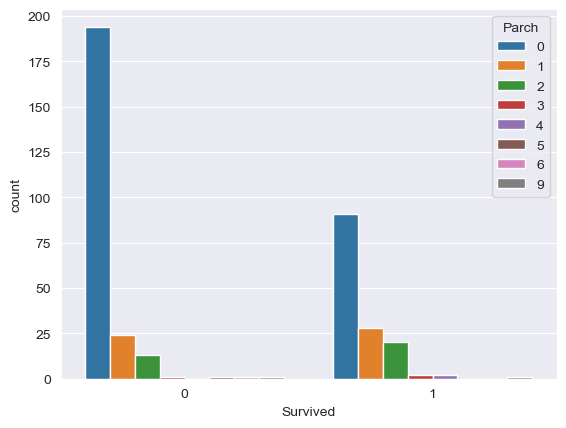

In [36]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Parch', data=df)

<Axes: >

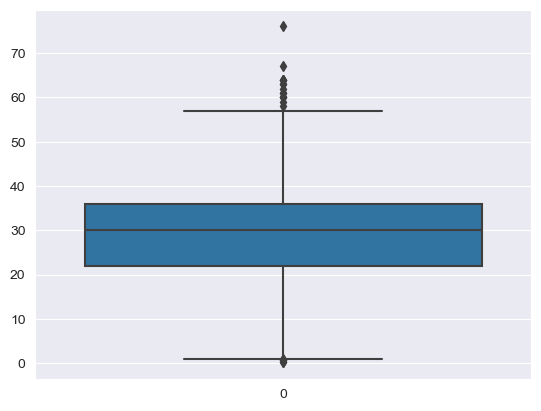

In [37]:
sns.boxplot(df['Age'])

In [38]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.096850,-1.000000,0.004889,0.088627,0.152756,0.185175,-0.079934
Pclass,-0.096850,1.000000,0.096850,-0.461800,0.027446,0.044105,-0.573116,0.265072
Sex,-1.000000,0.096850,1.000000,-0.004889,-0.088627,-0.152756,-0.185175,0.079934
Age,0.004889,-0.461800,-0.004889,1.000000,-0.079898,-0.044640,0.331123,-0.168183
SibSp,0.088627,0.027446,-0.088627,-0.079898,1.000000,0.297044,0.155156,0.063133
Parch,0.152756,0.044105,-0.152756,-0.044640,0.297044,1.000000,0.215962,0.057298
Fare,0.185175,-0.573116,-0.185175,0.331123,0.155156,0.215962,1.000000,-0.270851
Embarked,-0.079934,0.265072,0.079934,-0.168183,0.063133,0.057298,-0.270851,1.000000


C:\Users\Saad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


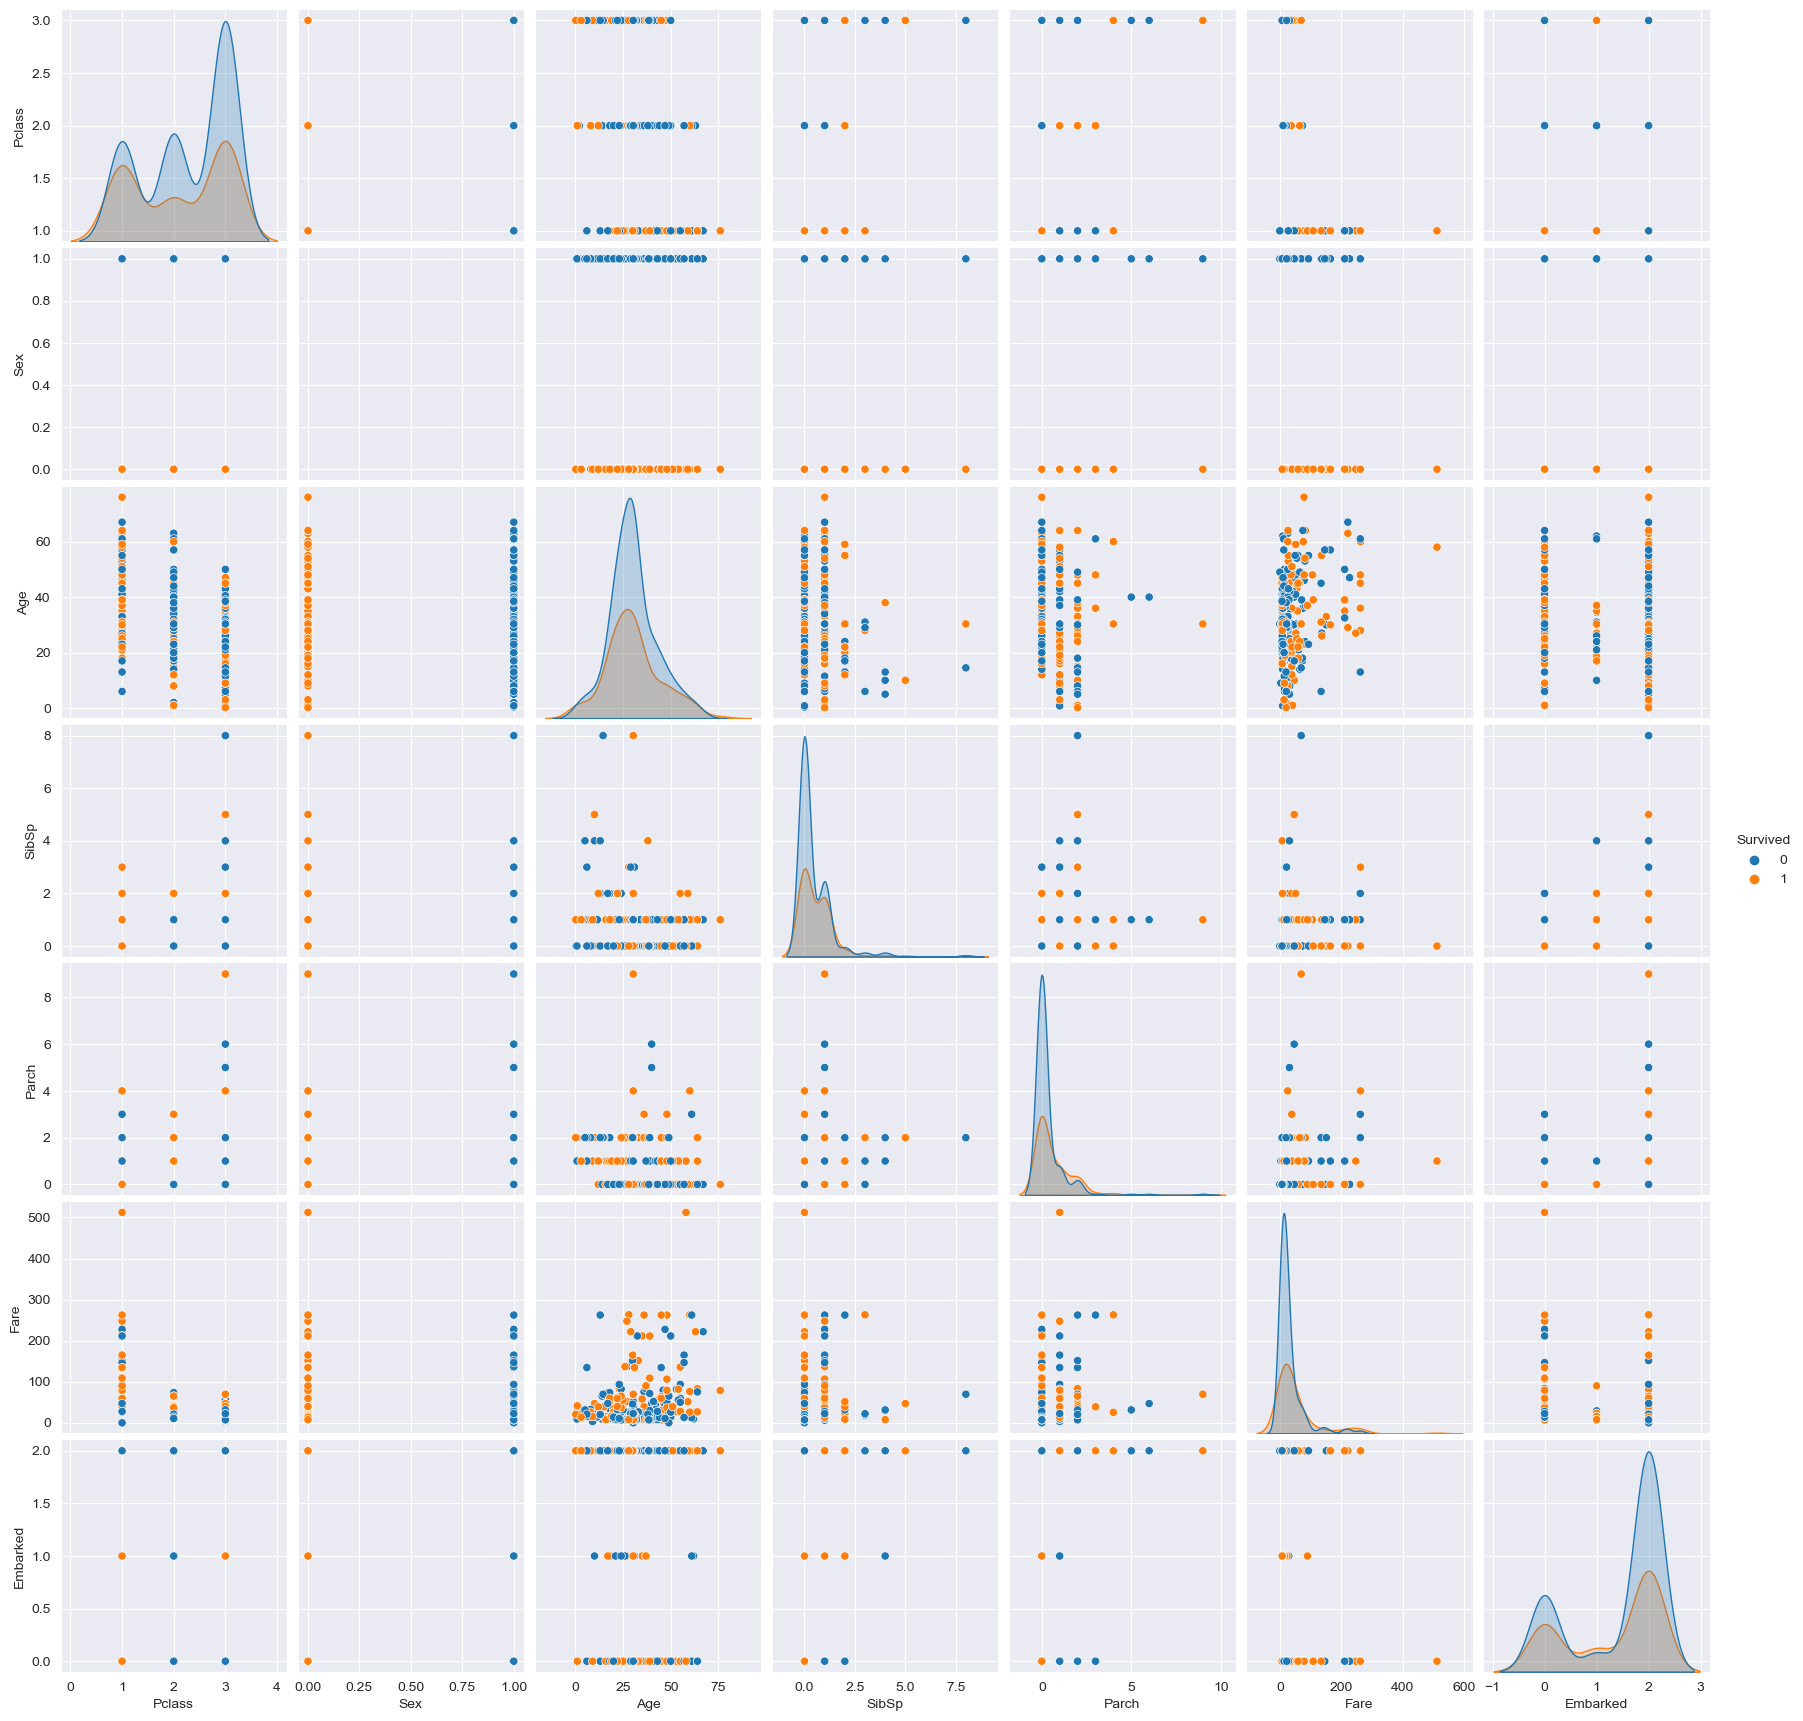

In [39]:
sns.pairplot(df,hue='Survived')

In [40]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [41]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.096850,-1.000000,0.004889,0.088627,0.152756,0.185175,-0.079934
Pclass,-0.096850,1.000000,0.096850,-0.461800,0.027446,0.044105,-0.573116,0.265072
Sex,-1.000000,0.096850,1.000000,-0.004889,-0.088627,-0.152756,-0.185175,0.079934
Age,0.004889,-0.461800,-0.004889,1.000000,-0.079898,-0.044640,0.331123,-0.168183
SibSp,0.088627,0.027446,-0.088627,-0.079898,1.000000,0.297044,0.155156,0.063133
Parch,0.152756,0.044105,-0.152756,-0.044640,0.297044,1.000000,0.215962,0.057298
Fare,0.185175,-0.573116,-0.185175,0.331123,0.155156,0.215962,1.000000,-0.270851
Embarked,-0.079934,0.265072,0.079934,-0.168183,0.063133,0.057298,-0.270851,1.000000


In [141]:
X = df.drop(columns=['Survived','SibSp','Parch','Fare'],axis=1)
X

,Pclass,Sex,Age,Embarked
0,3,1,34.500000,1
1,3,0,47.000000,2
2,2,1,62.000000,1
3,3,1,27.000000,2
4,3,0,22.000000,2
...,...,...,...,...
411,1,0,37.000000,1
412,3,0,28.000000,2
414,1,0,39.000000,0
415,3,1,38.500000,2


In [142]:
y=df['Survived']
y

0      0
1      1
2      0
3      0
4      1
      ..
411    1
412    1
414    1
415    0
417    0
Name: Survived, Length: 379, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [169]:
from sklearn.linear_model import LogisticRegression

In [170]:
LR = LogisticRegression(random_state=0)

In [171]:
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [172]:
y_pred = LR.predict(X_test)

In [173]:
LR.predict(X_test)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [180]:
pred = LR.predict([[2,0,20,1]])

if pred==0:
    print('Not Survived')

else:
    print('Survived')

Survived


C:\Users\Saad\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
